## Goals
In this lab you will:
- explore feature engineering and polynomial regression which allows you to use the machinery of linear regression to fit very complicated, even very non-linear functions.

## Tools
You will utilize the function developed in previous labs as well as matplotlib and NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## Polynomial Features

Iteration         0, Cost: 4.22309e+02
Iteration       100, Cost: 3.84260e+01
Iteration       200, Cost: 3.32315e+01
Iteration       300, Cost: 3.02807e+01
Iteration       400, Cost: 2.86045e+01
Iteration       500, Cost: 2.76523e+01
Iteration       600, Cost: 2.71114e+01
Iteration       700, Cost: 2.68041e+01
Iteration       800, Cost: 2.66296e+01
Iteration       900, Cost: 2.65304e+01
w,b found by gradient descent: w: [8.89], b: -10.2827


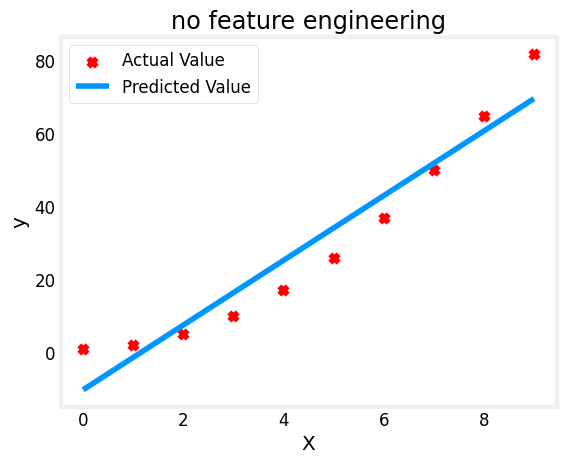

In [2]:
# create target data
x = np.arange(0, 10, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

In [3]:
# create target data
x = np.arange(0, 10, 1)
y = 1 + x**2

# Engineer features
X = x**2      #<-- added engineered feature

Iteration         0, Cost: 7.71436e+02
Iteration      1000, Cost: 2.24191e-01
Iteration      2000, Cost: 2.22093e-01
Iteration      3000, Cost: 2.20015e-01
Iteration      4000, Cost: 2.17956e-01
Iteration      5000, Cost: 2.15917e-01
Iteration      6000, Cost: 2.13896e-01
Iteration      7000, Cost: 2.11894e-01
Iteration      8000, Cost: 2.09912e-01
Iteration      9000, Cost: 2.07947e-01
w,b found by gradient descent: w: [1.02], b: 0.0640


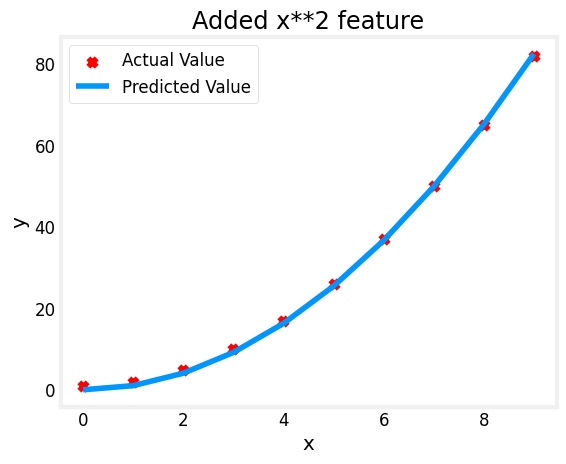

In [4]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

### Selecting Features
It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful.

In [5]:
# create target data
x = np.arange(0, 10, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

Iteration         0, Cost: 7.51886e+02
Iteration      1000, Cost: 1.97858e+01
Iteration      2000, Cost: 1.96084e+01
Iteration      3000, Cost: 1.94326e+01
Iteration      4000, Cost: 1.92584e+01
Iteration      5000, Cost: 1.90857e+01
Iteration      6000, Cost: 1.89146e+01
Iteration      7000, Cost: 1.87450e+01
Iteration      8000, Cost: 1.85770e+01
Iteration      9000, Cost: 1.84104e+01
w,b found by gradient descent: w: [0.01 0.05 0.12], b: 0.0036


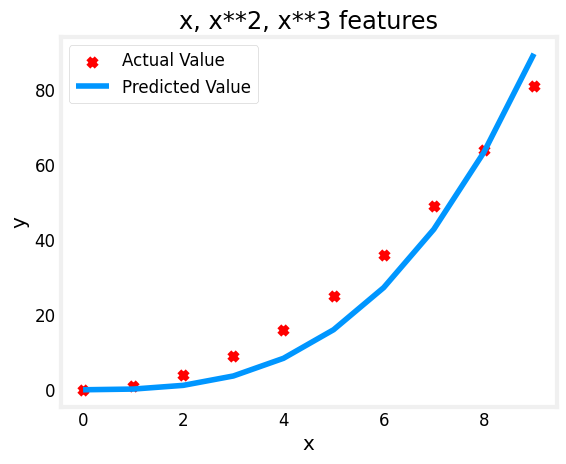

In [6]:
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Let's review this idea:
- Intially, the features were re-scaled so they are comparable to each other
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data.

### An Alternate View
Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example.

In [7]:
# create target data
x = np.arange(0, 10, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

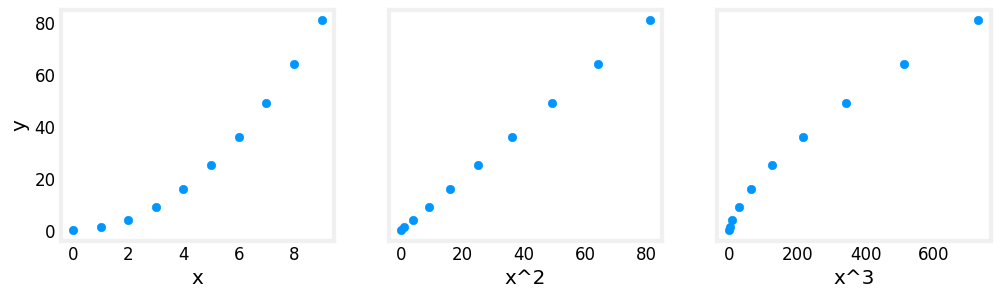

In [8]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

### Scaling features
As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [9]:
# create target data
x = np.arange(0,10,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  9  81 729]
Peak to Peak range by column in Normalized X:[3.13 3.02 3.06]


Iteration         0, Cost: 5.10830e+02
Iteration     10000, Cost: 1.81194e-02
Iteration     20000, Cost: 9.66850e-04
Iteration     30000, Cost: 5.15909e-05
Iteration     40000, Cost: 2.75288e-06
Iteration     50000, Cost: 1.46893e-07
Iteration     60000, Cost: 7.83819e-09
Iteration     70000, Cost: 4.18244e-10
Iteration     80000, Cost: 2.23174e-11
Iteration     90000, Cost: 1.19085e-12
w,b found by gradient descent: w: [2.85e-06 2.69e+01 4.78e-06], b: 28.5000


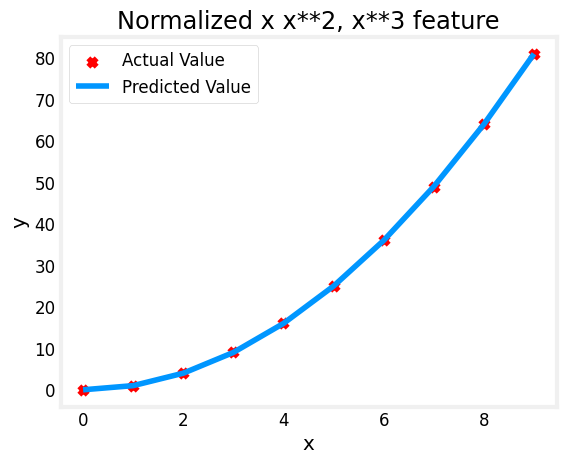

In [10]:
x = np.arange(0,10,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

### Complex Functions
With feature engineering, even quite complex functions can be modeled:

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


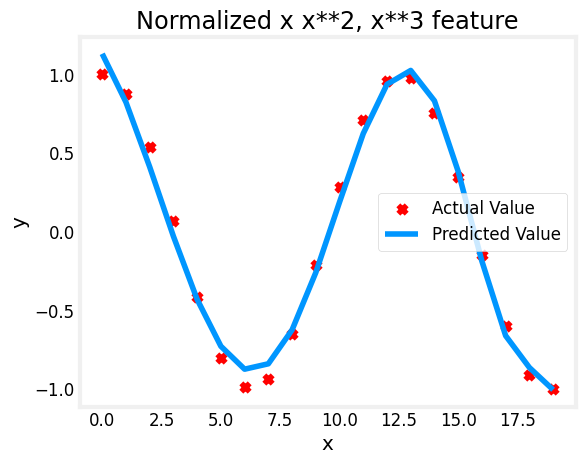

In [11]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()